# ПРОГНОЗИРОВАНИЕ №4 - ПРИБЫЛЬ

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpphskir1b
  JVM stdout: /tmp/tmpphskir1b/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpphskir1b/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_kdwqu7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV4.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_T')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Units,Revenue_T,Manufacturer,Segment,MonthNo,District
12,31676.4,Natura,Convenience,12,District #02
7,11020.6,Pirum,Productivity,12,District #38
3,35010.4,VanArsdel,Moderation,12,District #10
3,16441.1,Currus,Select,12,District #38
3,35541.4,Abbas,Moderation,12,District #36
2,2518.74,Natura,Youth,12,District #06
2,2518.74,Natura,Youth,12,District #13
2,9070.74,Quibus,Select,12,District #18
2,28348.7,VanArsdel,Moderation,12,District #05
2,9058.14,Currus,All Season,12,District #03


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Units,Revenue_T,Manufacturer,Segment,MonthNo,District
12,31676.4,Natura,Convenience,12,District #02
7,11020.6,Pirum,Productivity,12,District #38
3,16441.1,Currus,Select,12,District #38
3,35541.4,Abbas,Moderation,12,District #36
2,2518.74,Natura,Youth,12,District #06
2,2518.74,Natura,Youth,12,District #13
2,28348.7,VanArsdel,Moderation,12,District #05
2,10382.4,Natura,Convenience,12,District #31
1,6708.87,VanArsdel,Convenience,12,District #24
1,15113.7,Natura,Moderation,12,District #02


In [5]:
valid

Units,Revenue_T,Manufacturer,Segment,MonthNo,District
2,9070.74,Quibus,Select,12,District #18
2,9058.14,Currus,All Season,12,District #03
1,7049.7,Aliqui,Extreme,12,District #36
1,12851.4,VanArsdel,Moderation,12,District #28
1,12851.4,VanArsdel,Moderation,12,District #20
1,12851.4,VanArsdel,Moderation,12,District #09
1,12851.4,VanArsdel,Moderation,12,District #30
1,7370.37,Currus,Extreme,12,District #36
1,16316.4,VanArsdel,Moderation,12,District #03
1,16316.4,VanArsdel,Moderation,12,District #30


In [6]:
unseen

Units,Revenue_T,Manufacturer,Segment,MonthNo,District
3,35010.4,VanArsdel,Moderation,12,District #10
2,26458.7,Natura,Moderation,12,District #10
1,14615.4,Natura,Moderation,12,District #12
1,7238.7,Natura,Extreme,12,District #14
1,12851.4,VanArsdel,Moderation,12,District #19
1,12851.4,VanArsdel,Moderation,12,District #23
1,12851.4,VanArsdel,Moderation,12,District #02
1,7307.37,Currus,Extreme,12,District #15
1,7307.37,Currus,Extreme,12,District #09
1,16316.4,VanArsdel,Moderation,12,District #01


In [7]:
y = "Revenue_T"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
13:38:07.247: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),1/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230922_133806,2366.24,5.5991e+06,1614.26,0.380048,5.5991e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20230922_133806,2366.64,5.60099e+06,1615.59,0.381131,5.60099e+06
GBM_2_AutoML_1_20230922_133806,2372.24,5.62752e+06,1616.14,0.382463,5.62752e+06
GBM_3_AutoML_1_20230922_133806,2382.97,5.67854e+06,1616.1,0.382582,5.67854e+06
XGBoost_3_AutoML_1_20230922_133806,2393.72,5.7299e+06,1624.37,0.38337,5.7299e+06
GBM_4_AutoML_1_20230922_133806,2404.78,5.78296e+06,1621.45,0.382828,5.78296e+06
XGBoost_2_AutoML_1_20230922_133806,2416.52,5.83959e+06,1620.59,nan,5.83959e+06
XGBoost_1_AutoML_1_20230922_133806,2437.03,5.93914e+06,1635.5,0.386014,5.93914e+06
GBM_1_AutoML_1_20230922_133806,2573.25,6.62161e+06,1637.28,0.385192,6.62161e+06
DRF_1_AutoML_1_20230922_133806,2756.94,7.60071e+06,1705.68,0.404504,7.60071e+06


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230922_133806',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230922_133806',
 'GBM_2_AutoML_1_20230922_133806',
 'GBM_3_AutoML_1_20230922_133806',
 'XGBoost_3_AutoML_1_20230922_133806',
 'GBM_4_AutoML_1_20230922_133806',
 'XGBoost_2_AutoML_1_20230922_133806',
 'XGBoost_1_AutoML_1_20230922_133806',
 'GBM_1_AutoML_1_20230922_133806',
 'DRF_1_AutoML_1_20230922_133806',
 'XRT_1_AutoML_1_20230922_133806',
 'GLM_1_AutoML_1_20230922_133806']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),1/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 6755.22318915726,
 'GBM_2_AutoML_1_20230922_133806': 2144.195480994645,
 'GBM_3_AutoML_1_20230922_133806': 1007.4435576693559,
 'XGBoost_3_AutoML_1_20230922_133806': 1509.0513847128057,
 'GBM_4_AutoML_1_20230922_133806': 0.0,
 'XGBoost_2_AutoML_1_20230922_133806': 0.0,
 'XGBoost_1_AutoML_1_20230922_133806': 0.0,
 'GBM_1_AutoML_1_20230922_133806': 0.0,
 'DRF_1_AutoML_1_20230922_133806': 0.0,
 'XRT_1_AutoML_1_20230922_133806': 0.0,
 'GLM_1_AutoML_1_20230922_133806': 0.0}

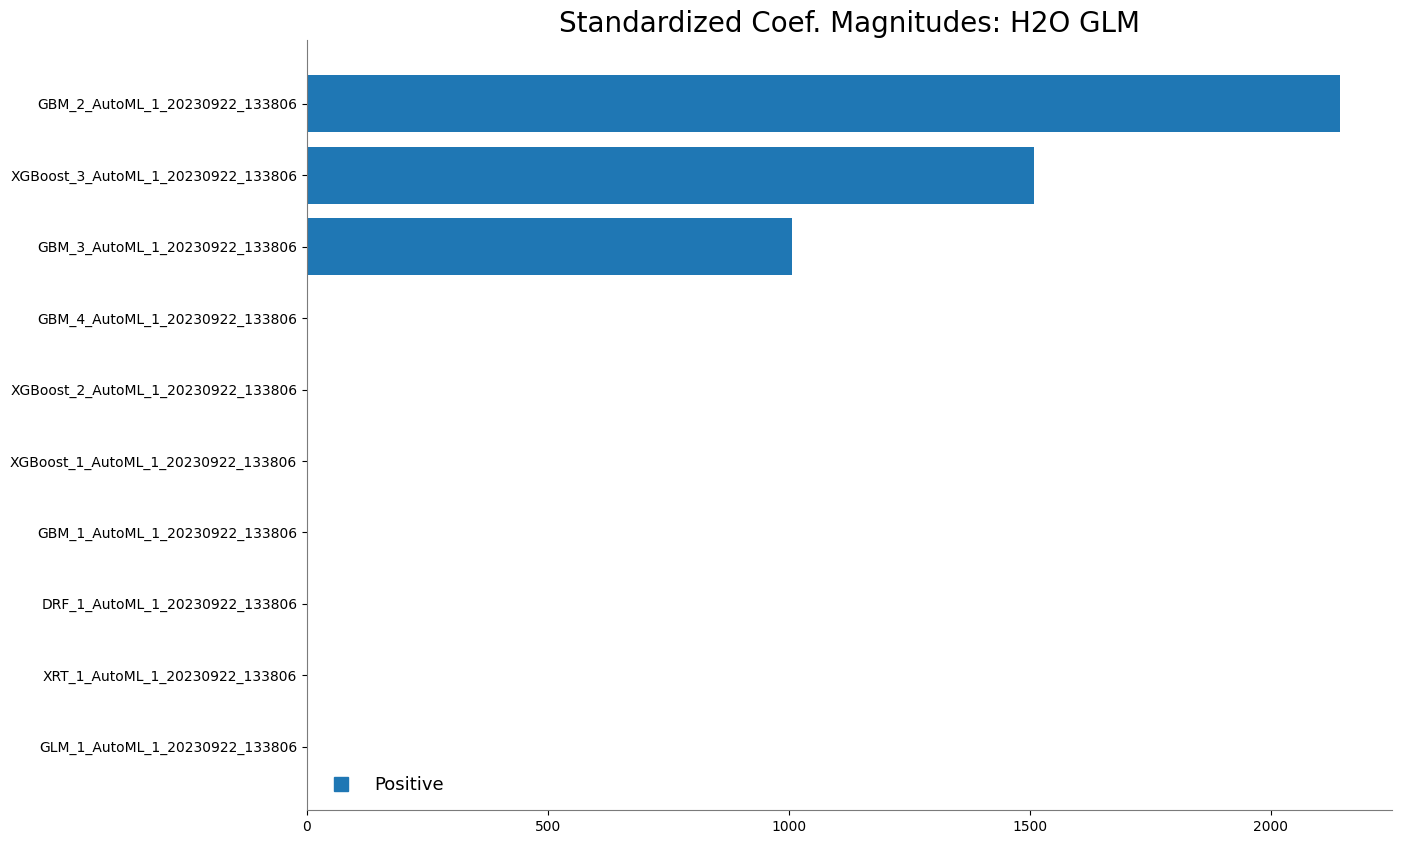

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230922_133806
StackedEnsemble_AllModels_1_AutoML_1_20230922_133806 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230922_133806
StackedEnsemble_BestOfFamily_1_AutoML_1_20230922_133806 - ERROR PLOTTING
Model ID: GBM_2_AutoML_1_20230922_133806


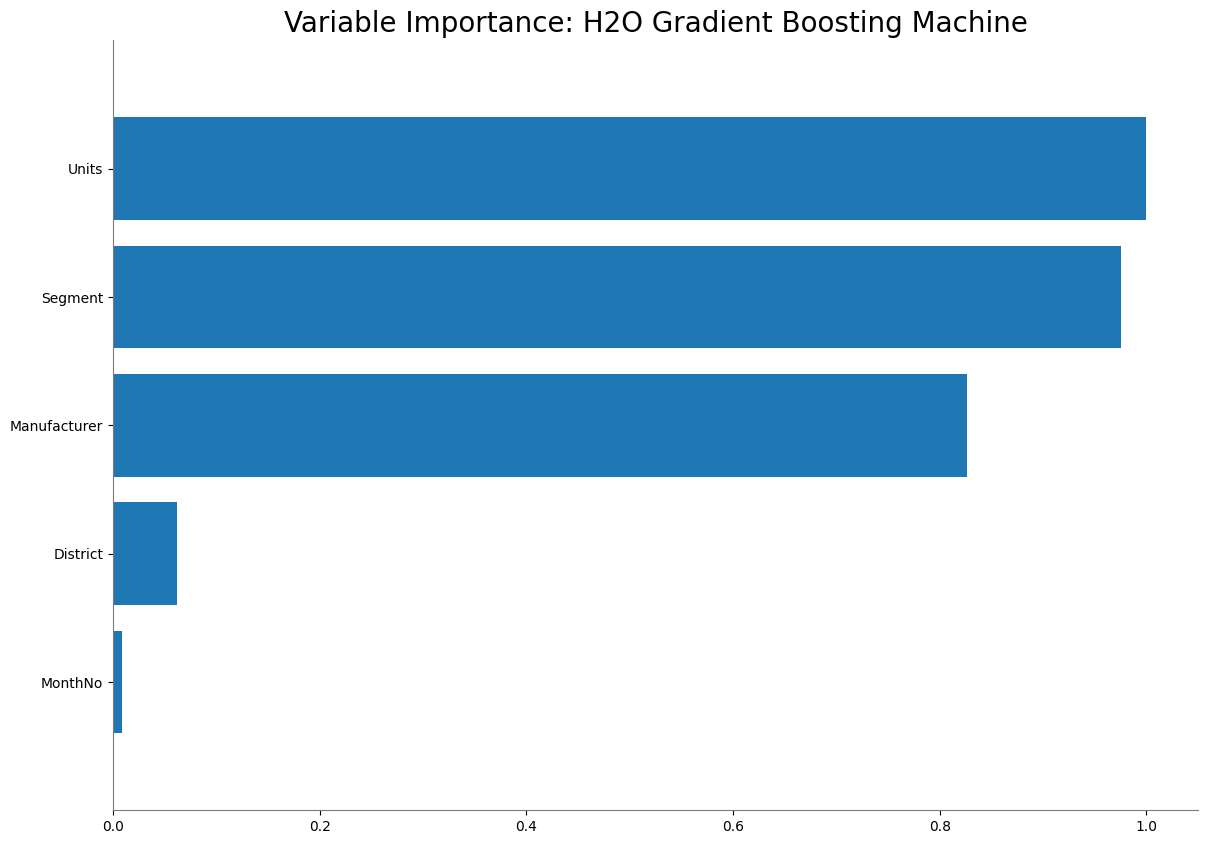

Model ID: GBM_3_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

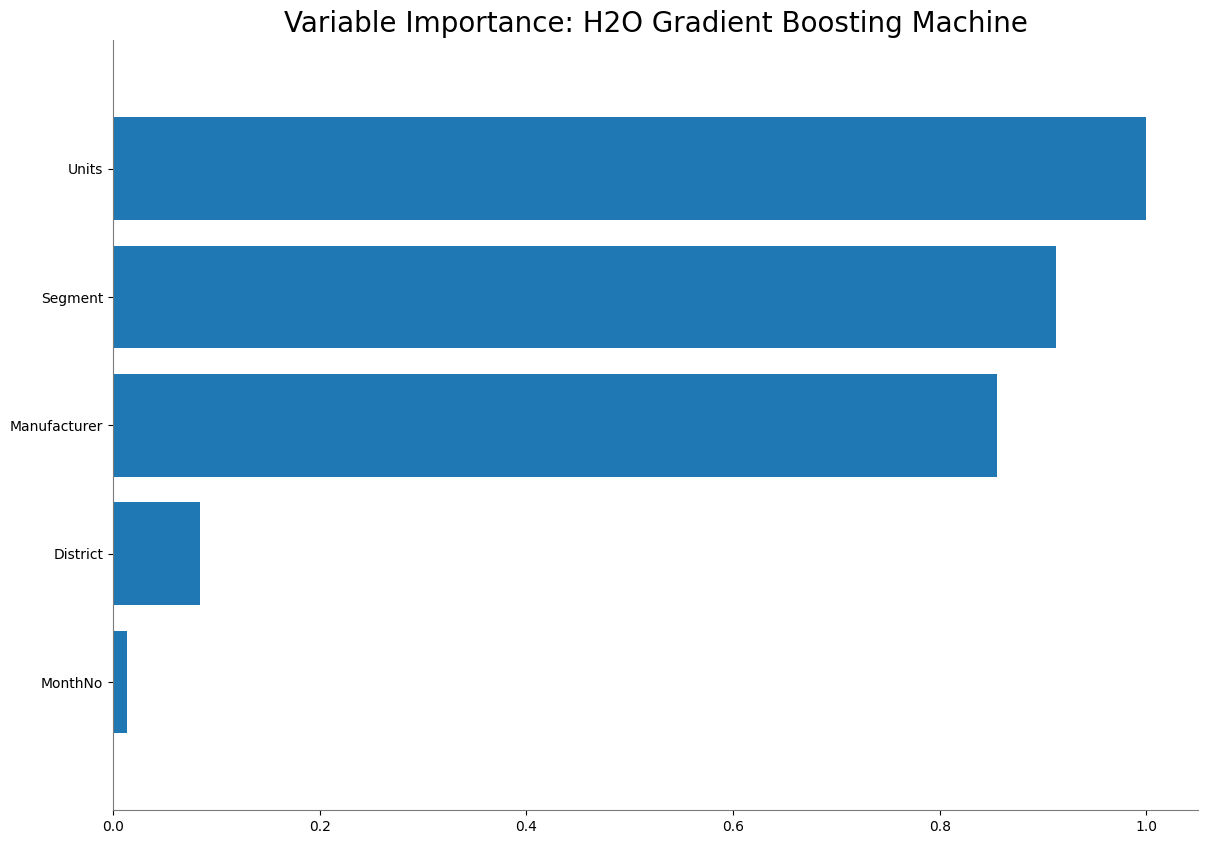

Model ID: XGBoost_3_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

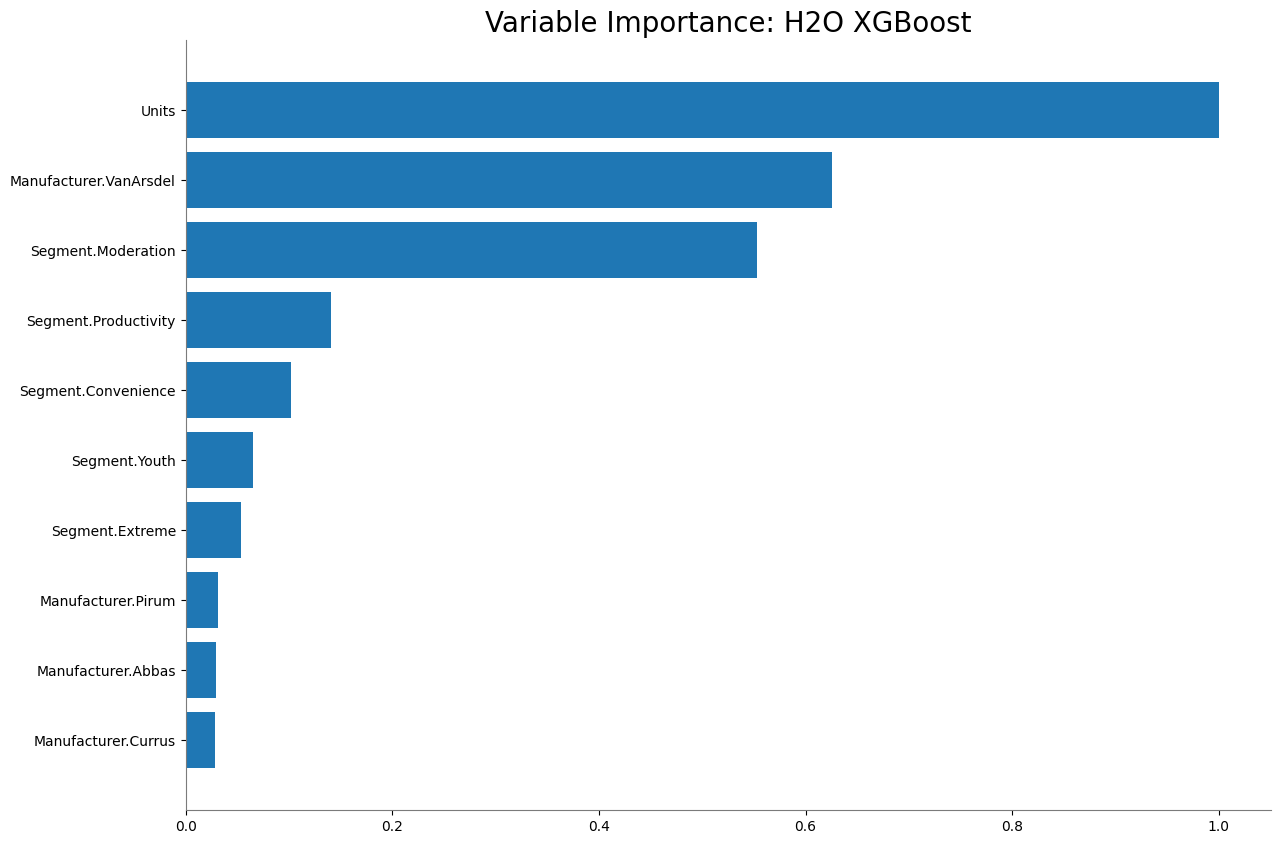

Model ID: GBM_4_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

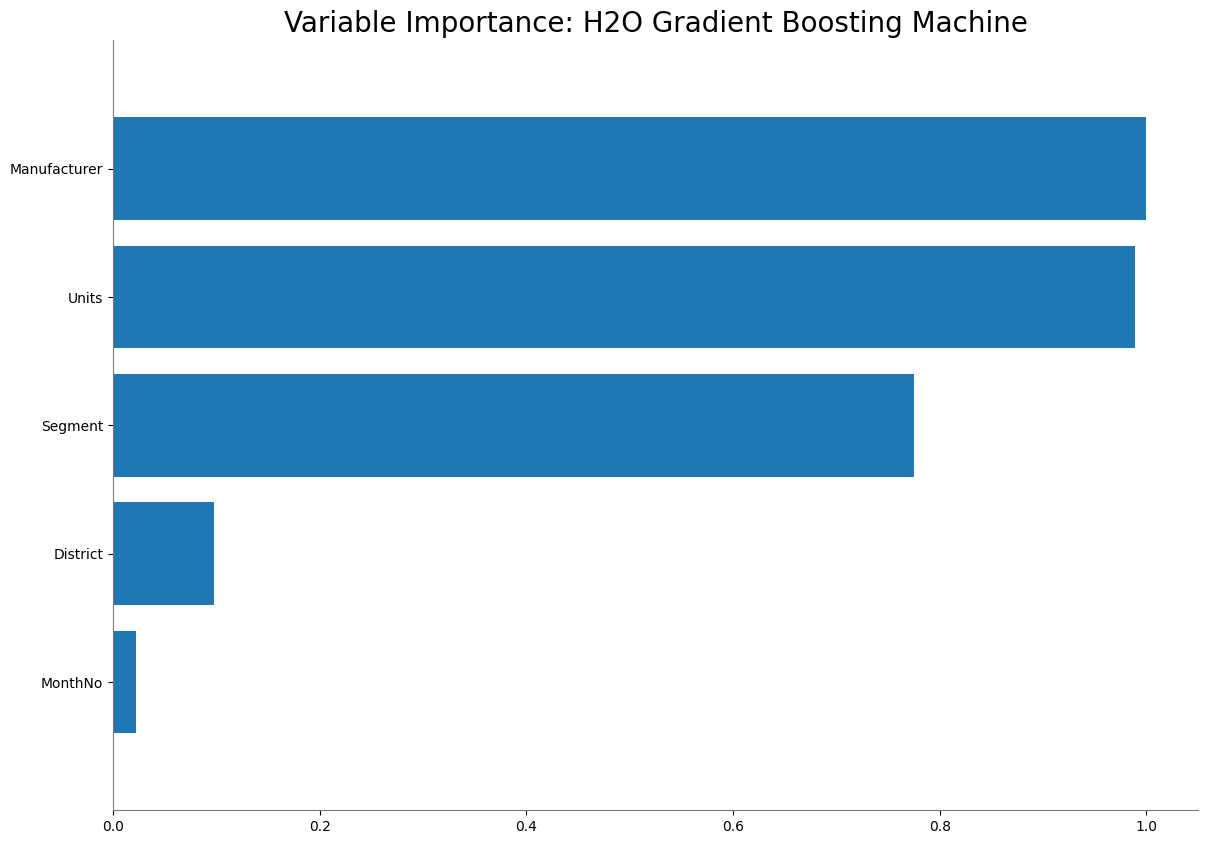

Model ID: XGBoost_2_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

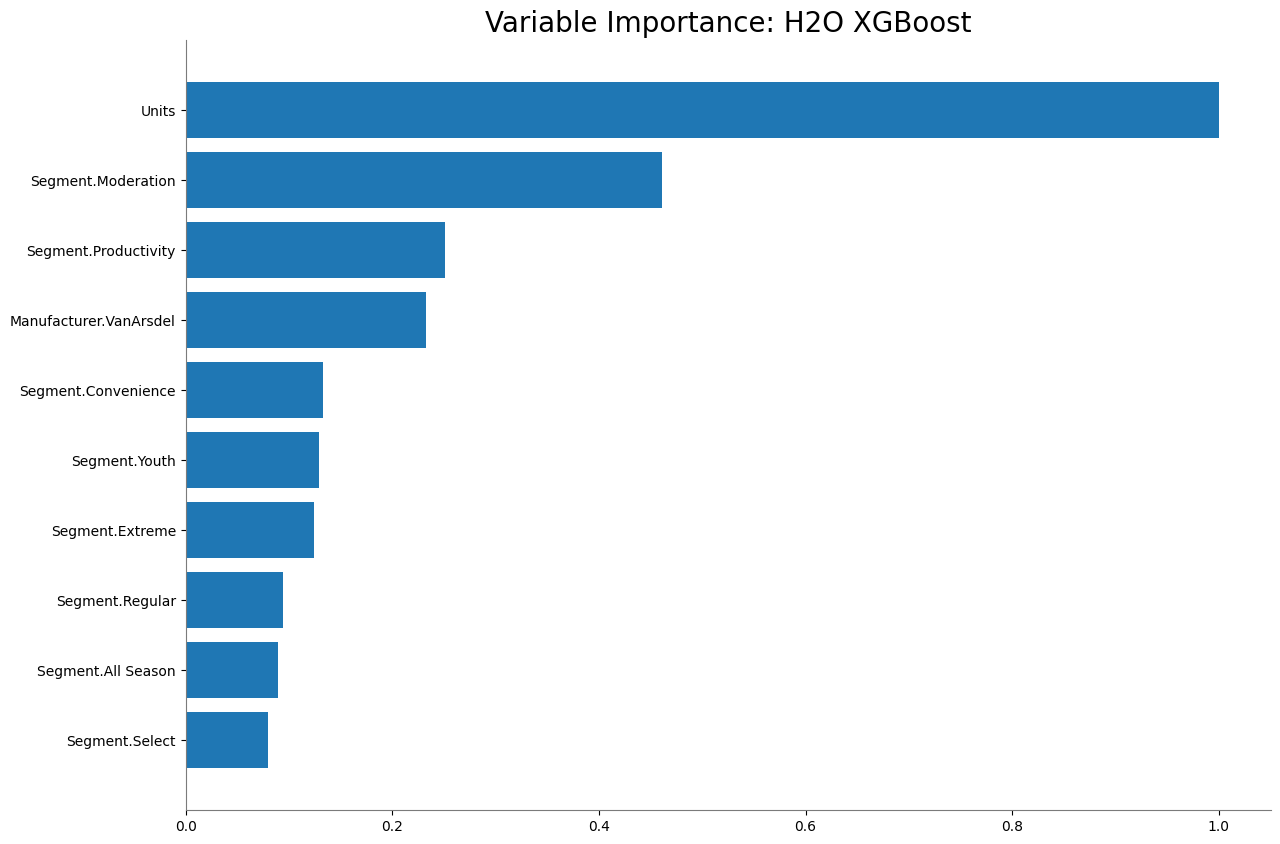

Model ID: XGBoost_1_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

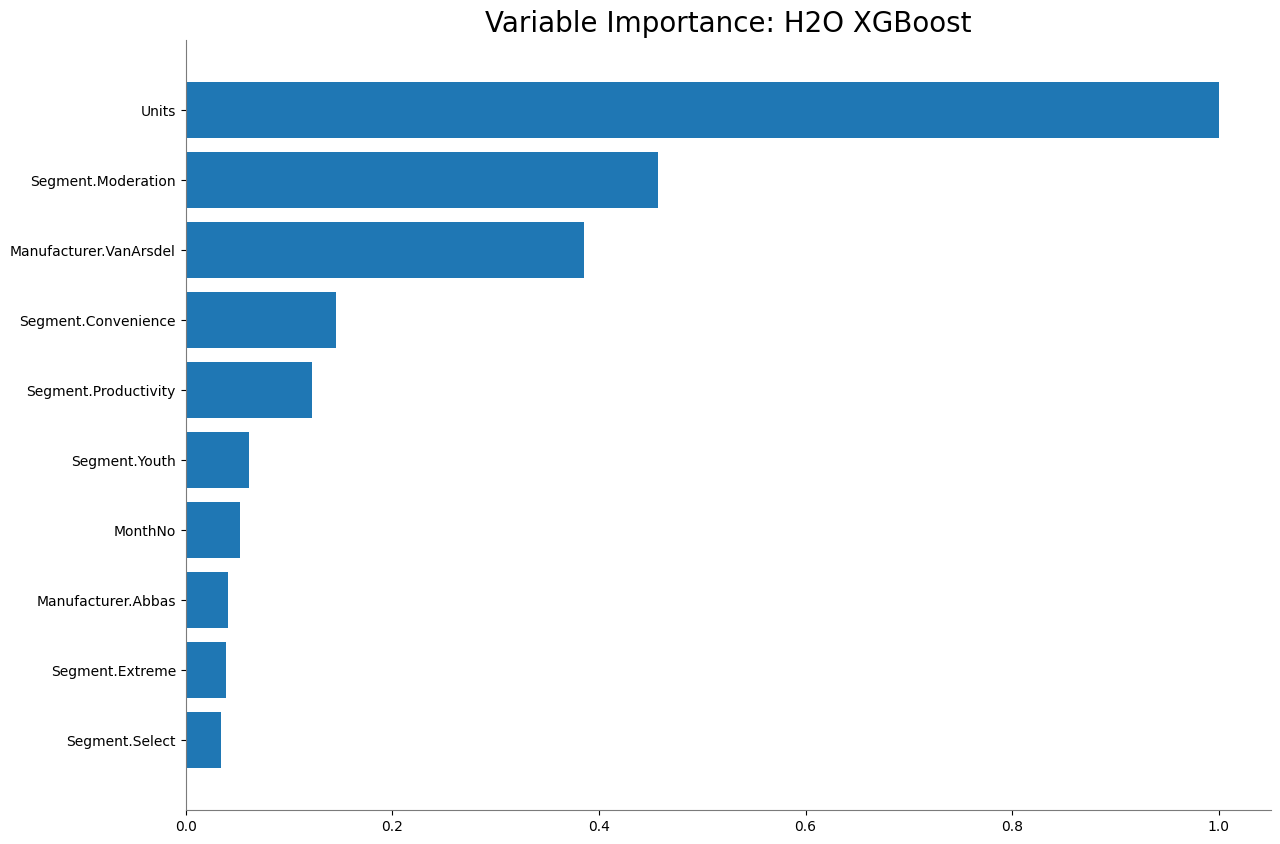

Model ID: GBM_1_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

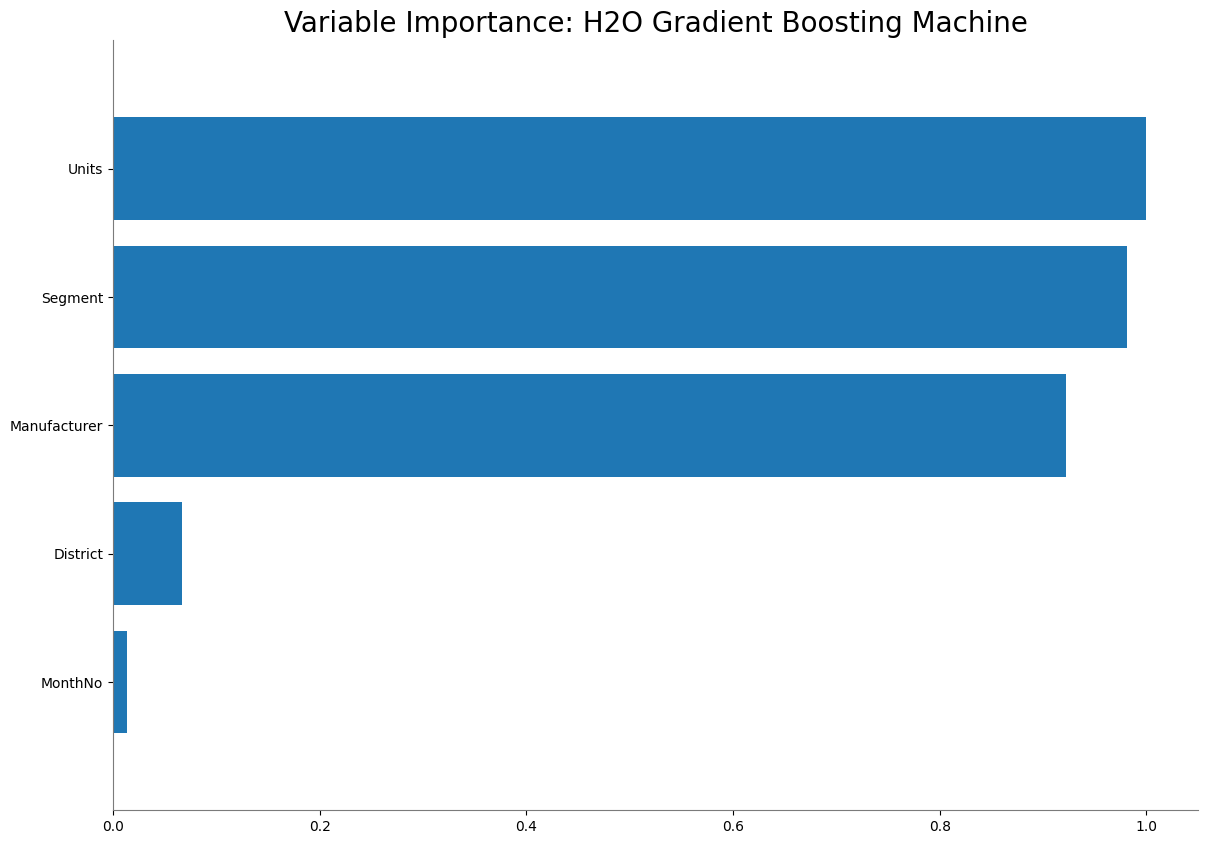

Model ID: DRF_1_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

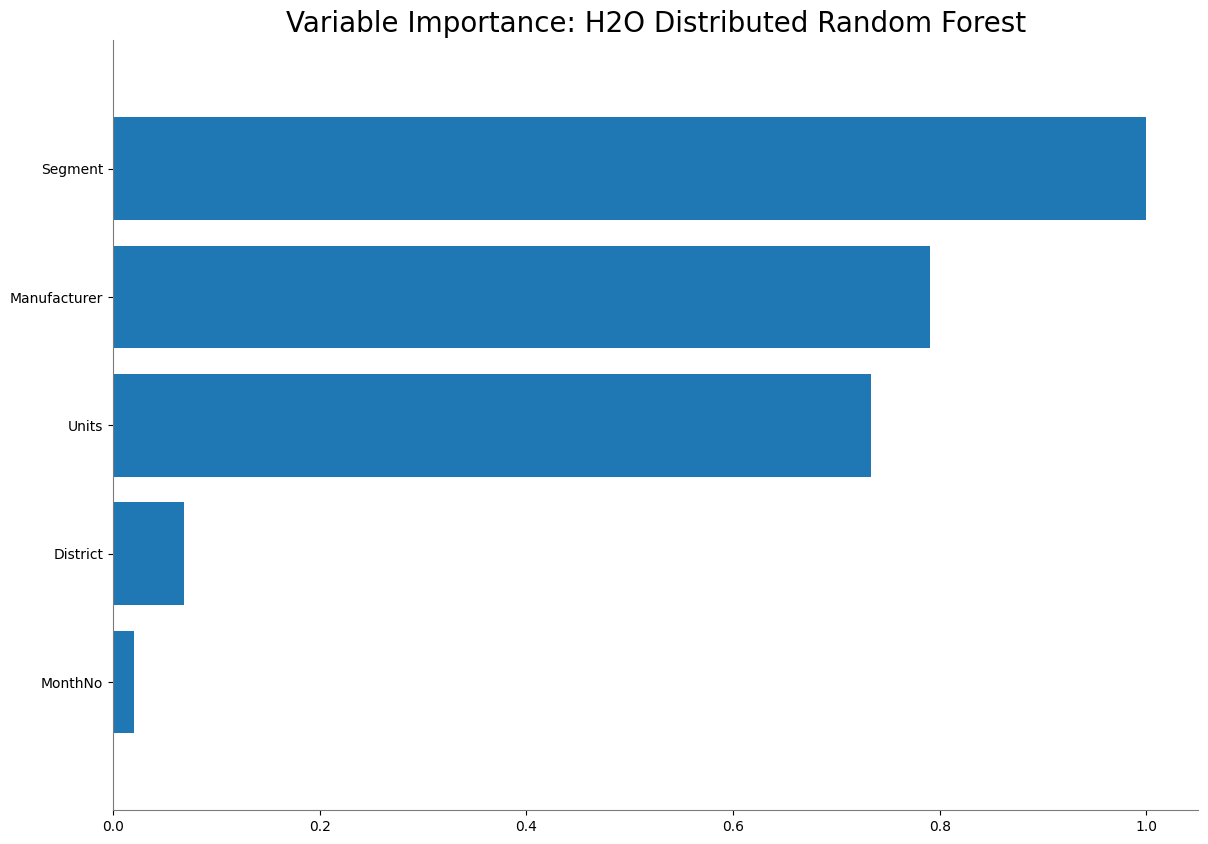

Model ID: XRT_1_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

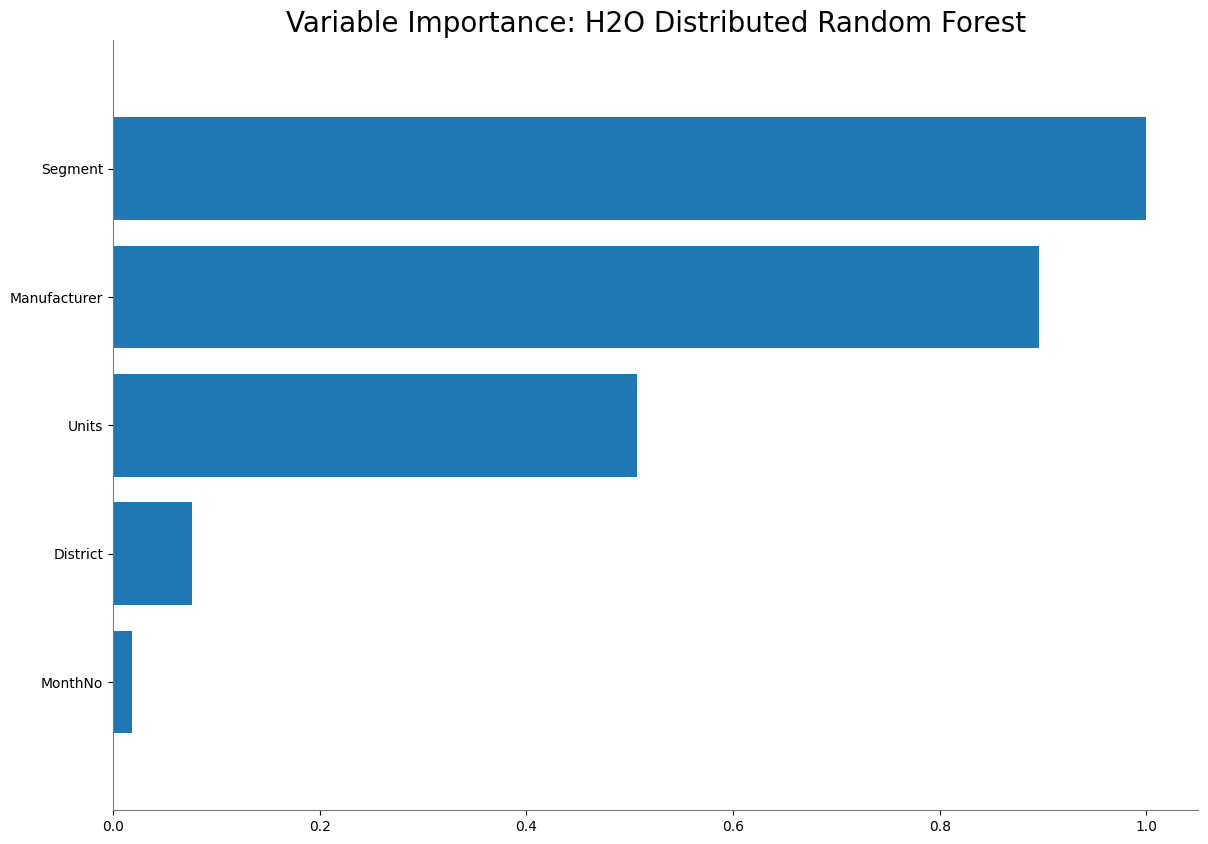

Model ID: GLM_1_AutoML_1_20230922_133806


<Figure size 640x480 with 0 Axes>

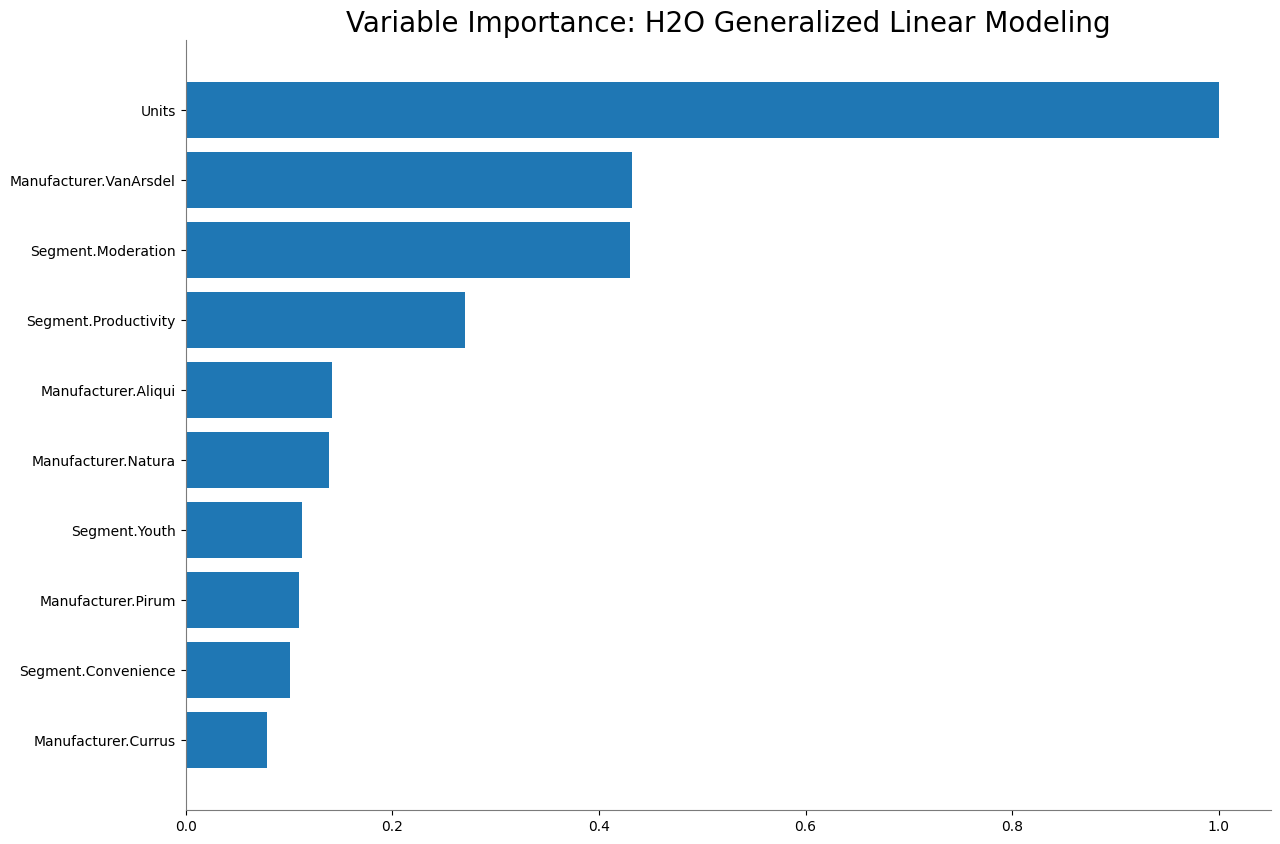

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Revenue_T'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230922_133806
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5576034.198332082
RMSE: 2361.362784142259
MAE: 1616.8851751510708
RMSLE: 0.3801563566885604
Mean Residual Deviance: 5576034.198332082
R^2: 0.8077621686364633
Null degrees of freedom: 60774
Residual degrees of freedom: 60771
Null deviance: 1762843768589.7632
Residual deviance: 338883478403.63226
AIC: 1116560.121565554
R2 cross validation: 0.8491028668760285
R2 test validation: 0.8077621686364633
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.778187892716125
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230922_133806
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5570566.883062892
RMSE: 2360.204839216904
MAE: 1616.8149442349015
RMSLE: 0.37951195297723456
Mean Residual Deviance: 5570566.883062892

# Графии кривых обучения

StackedEnsemble_AllModels_1_AutoML_1_20230922_133806 - ERROR PLOT


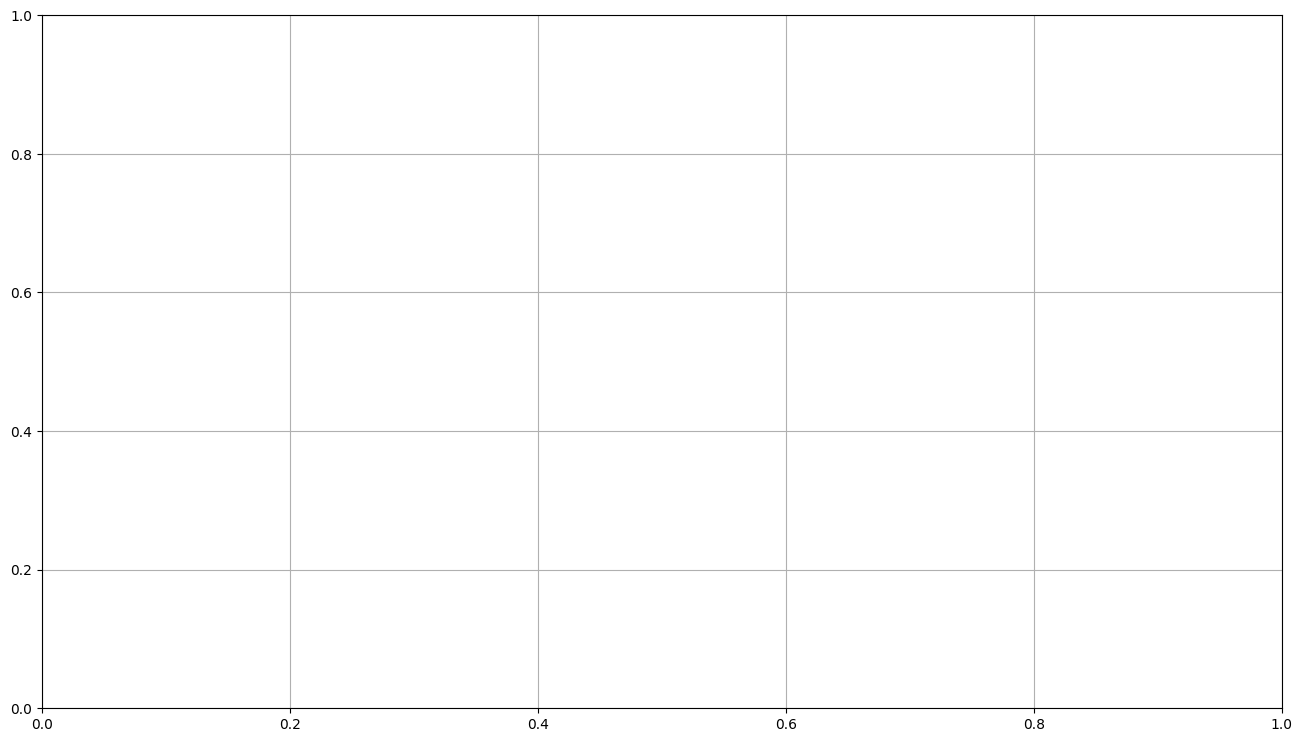

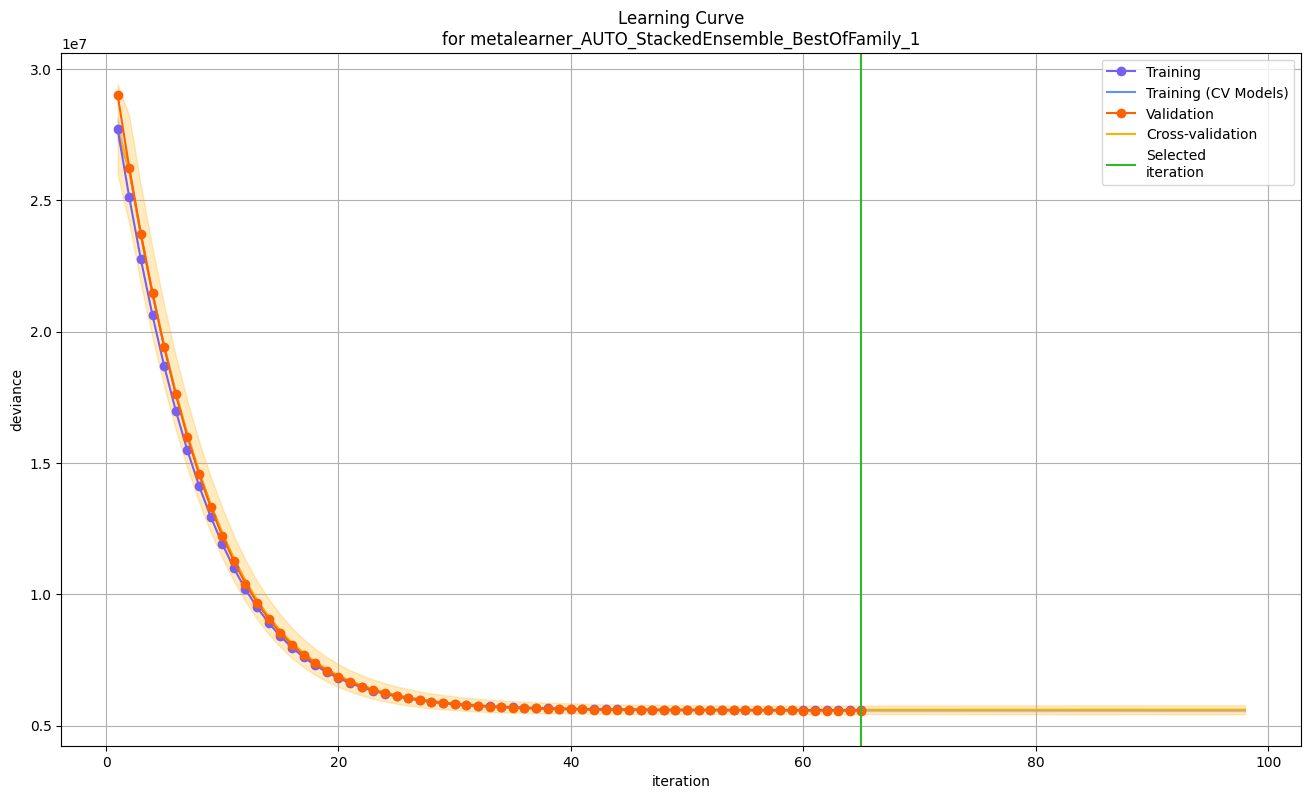

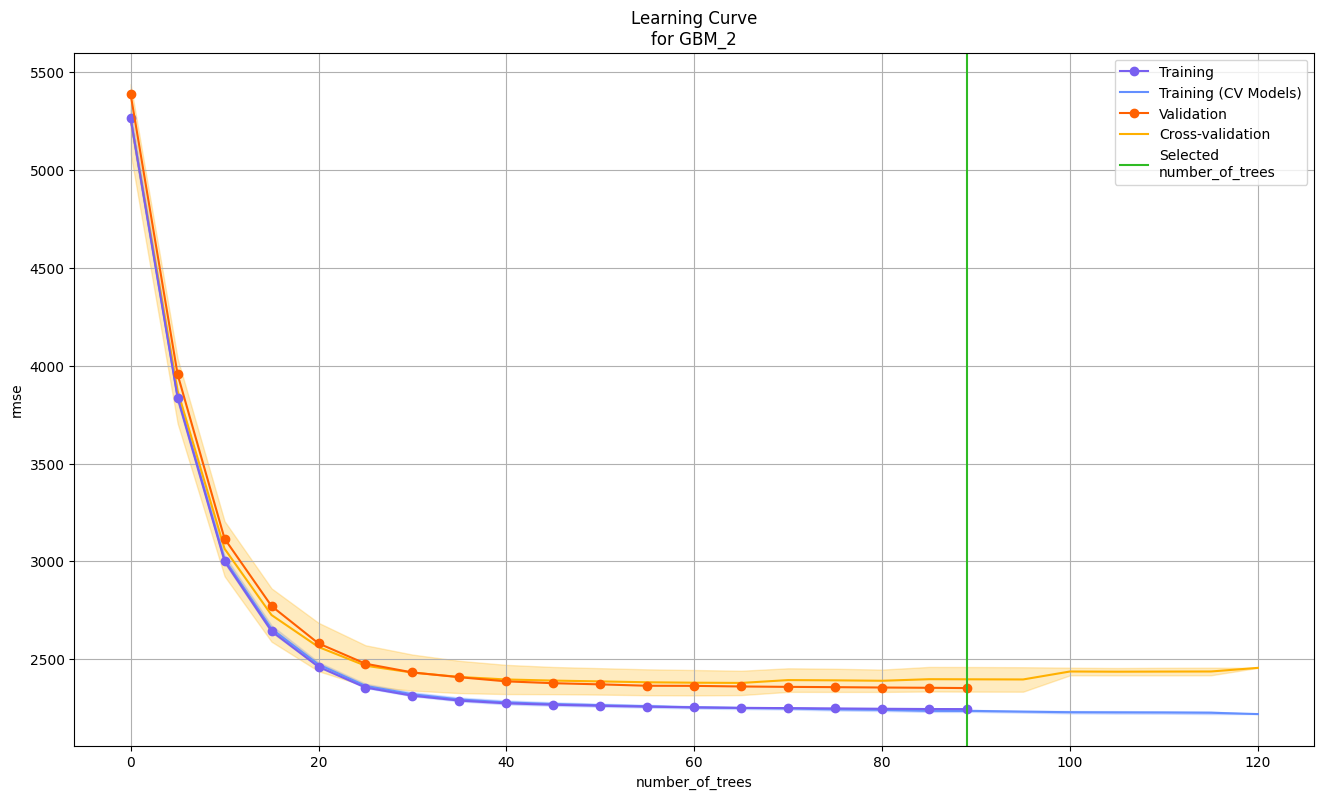

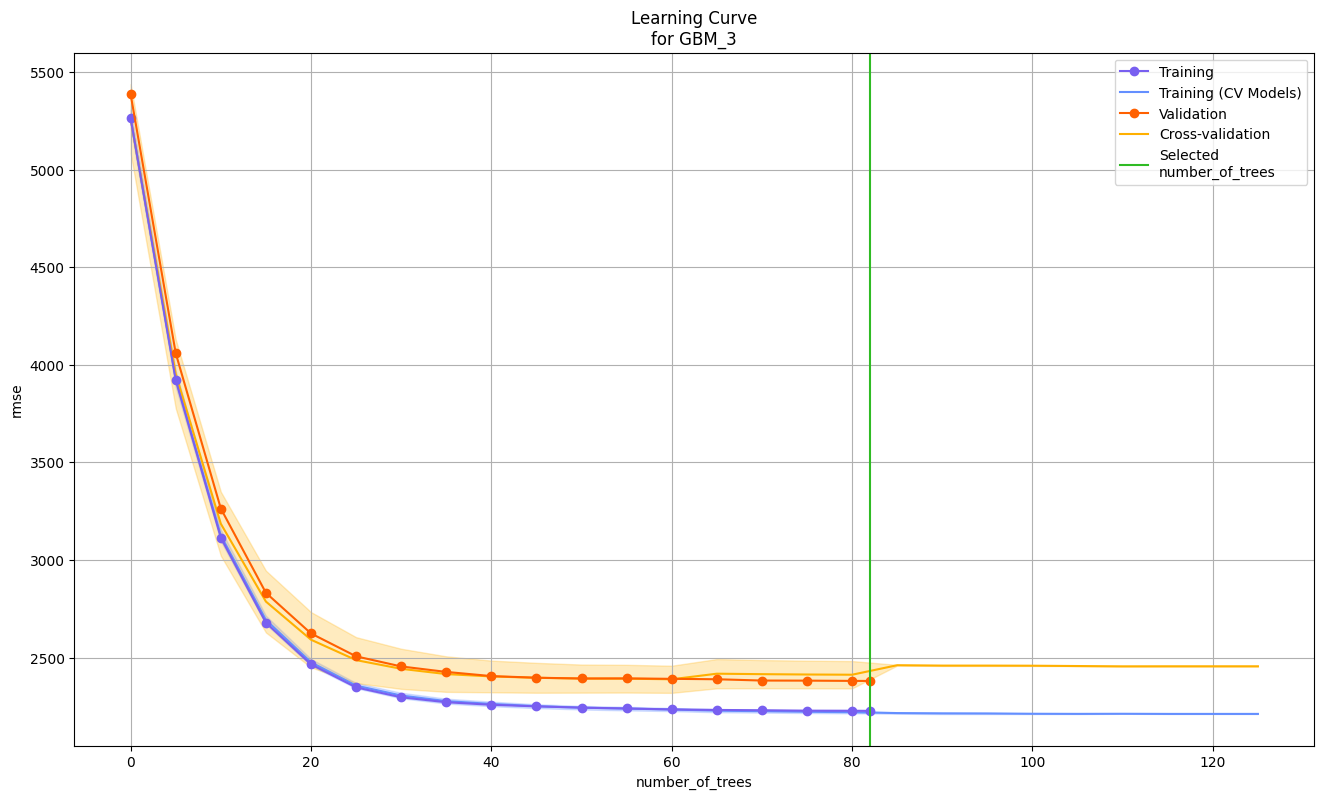

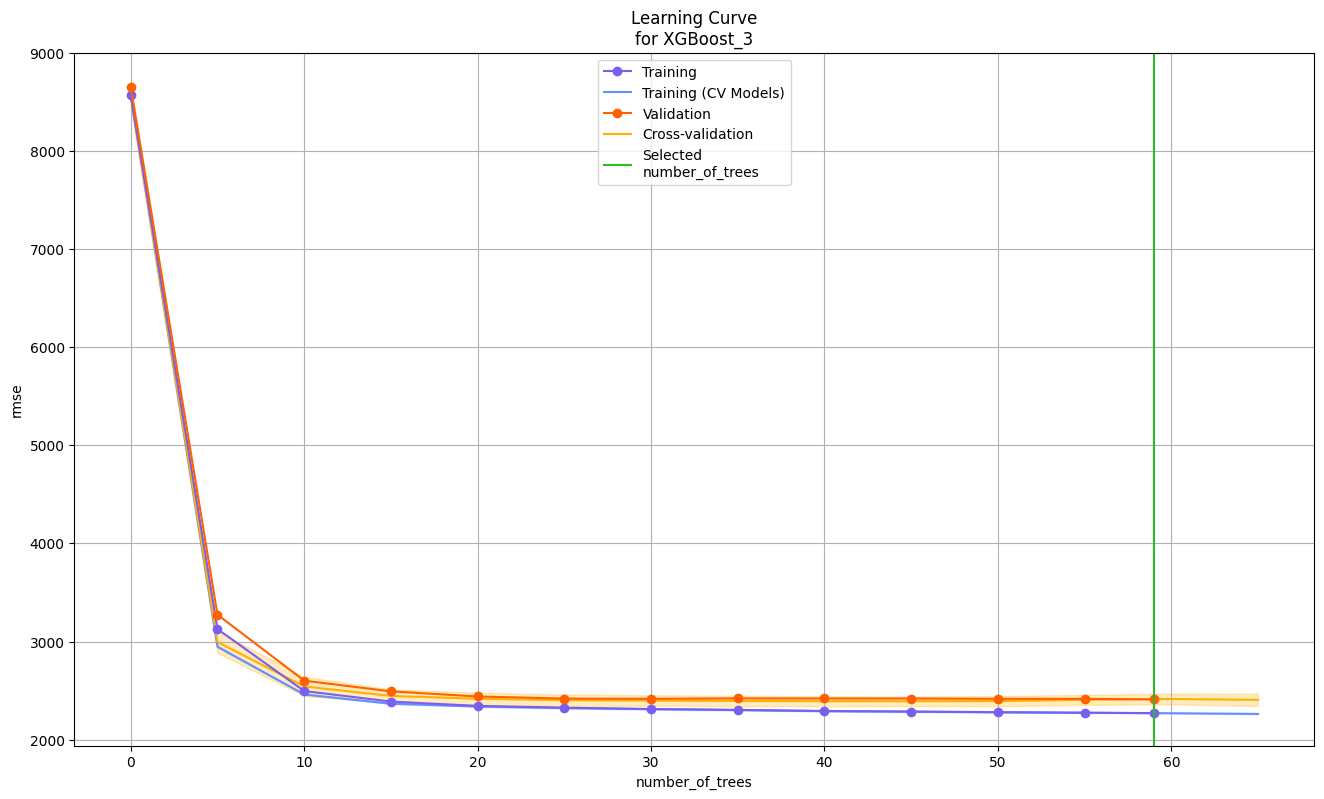

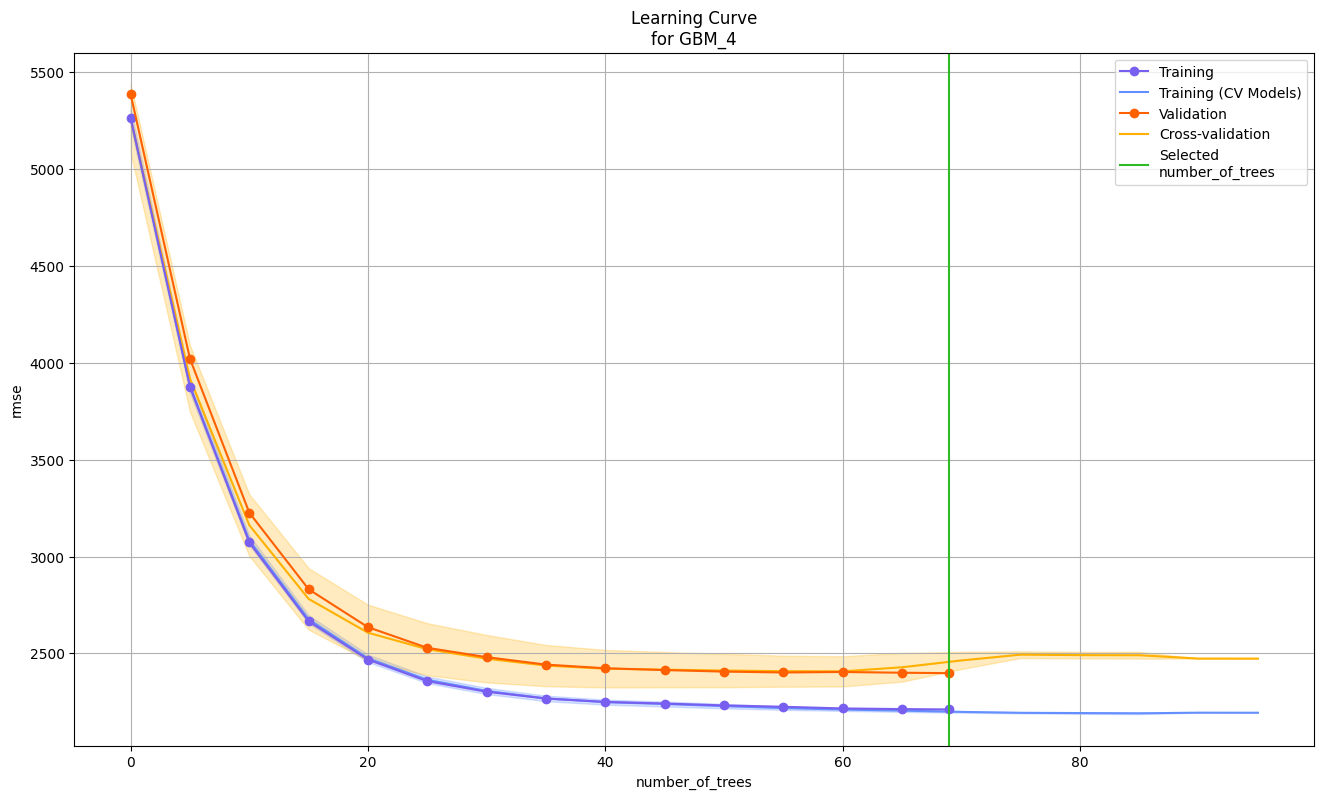

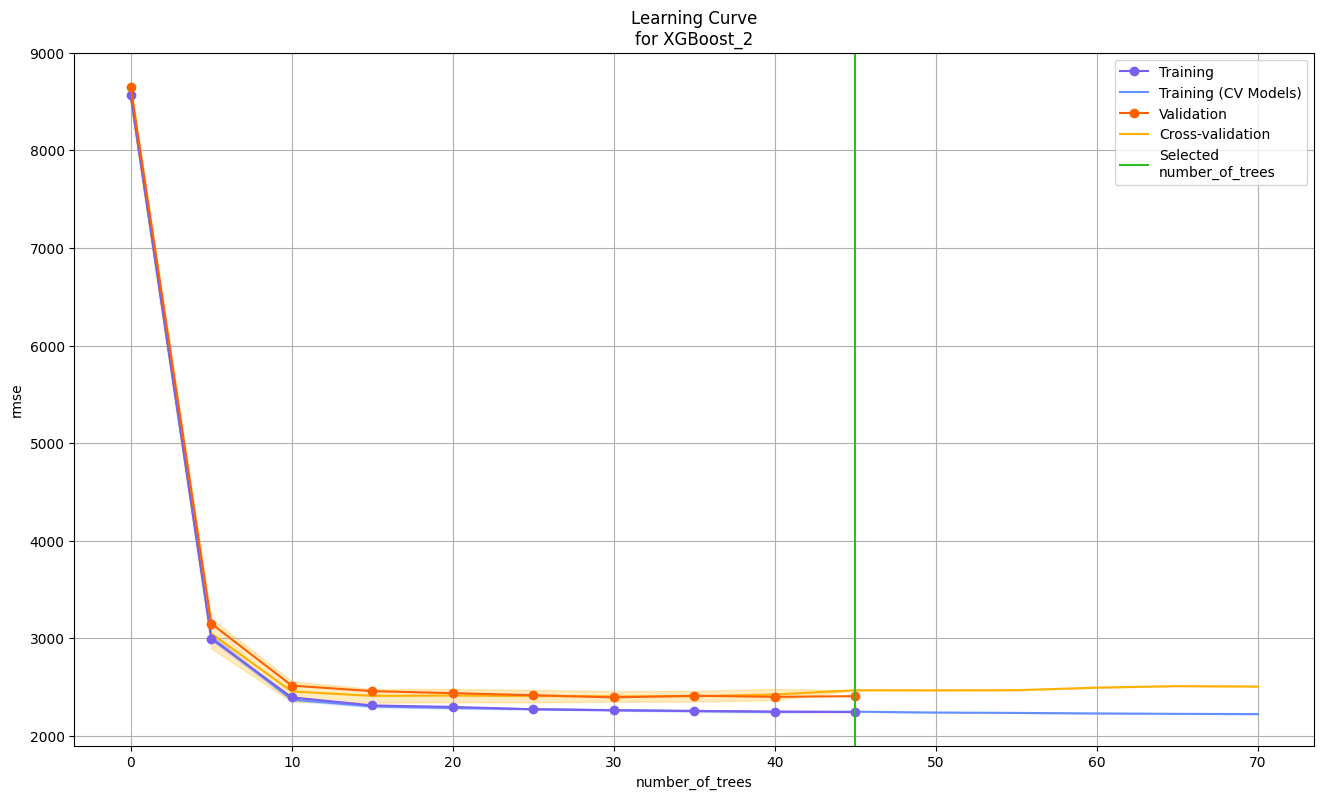

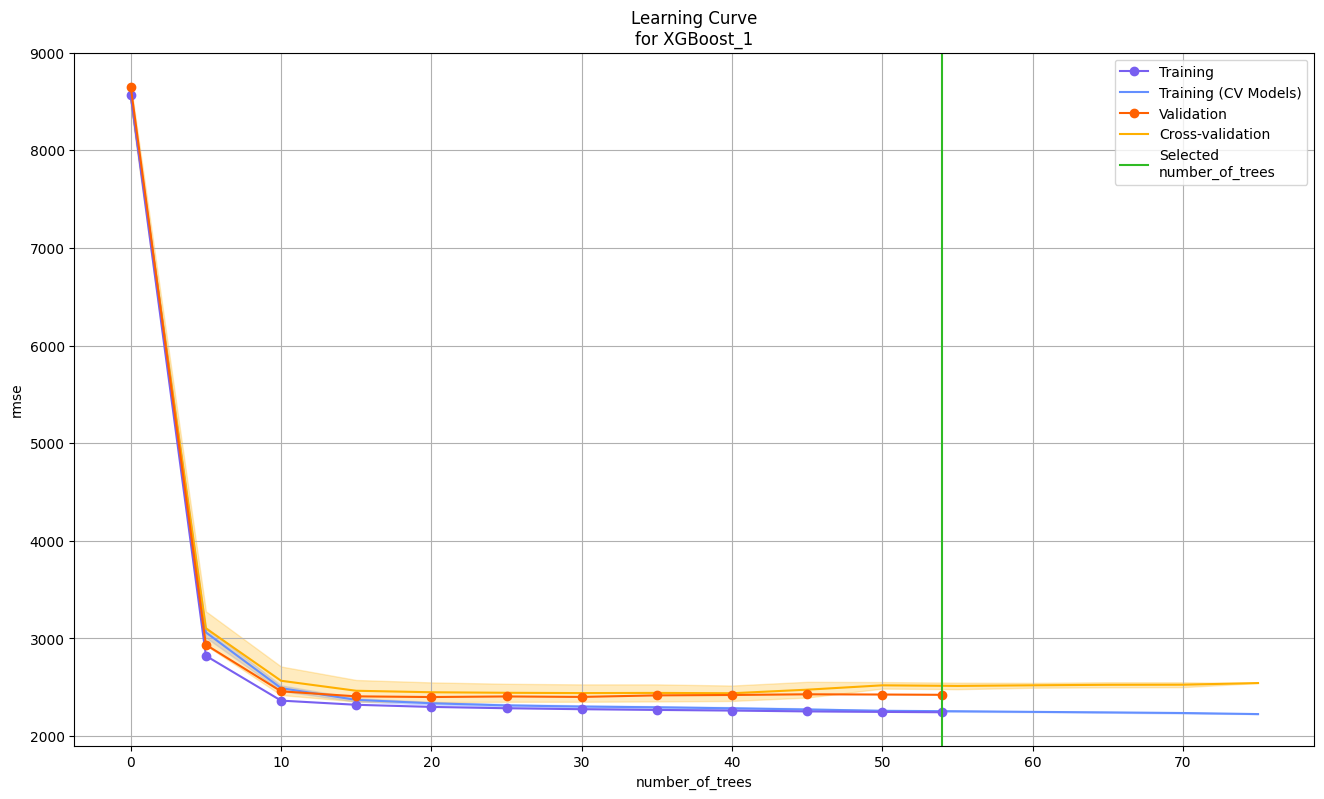

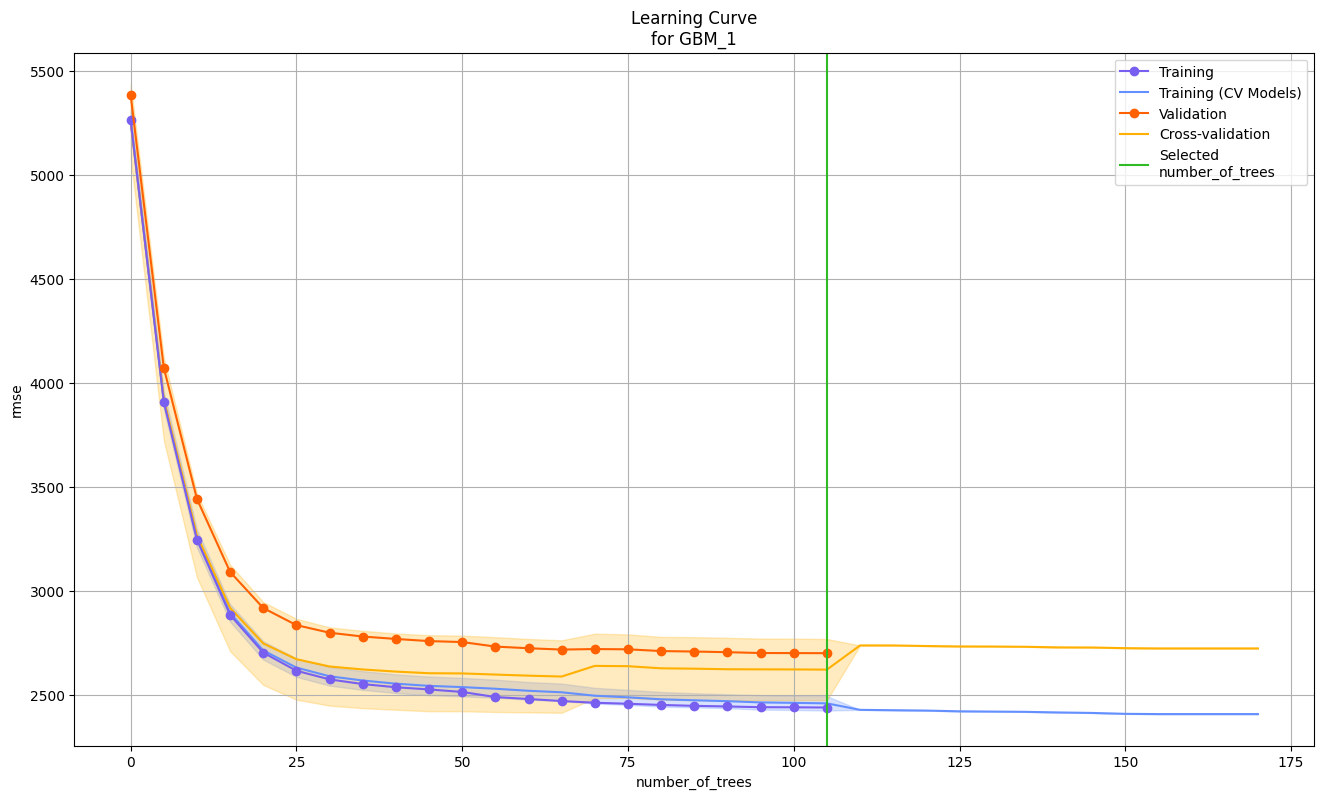

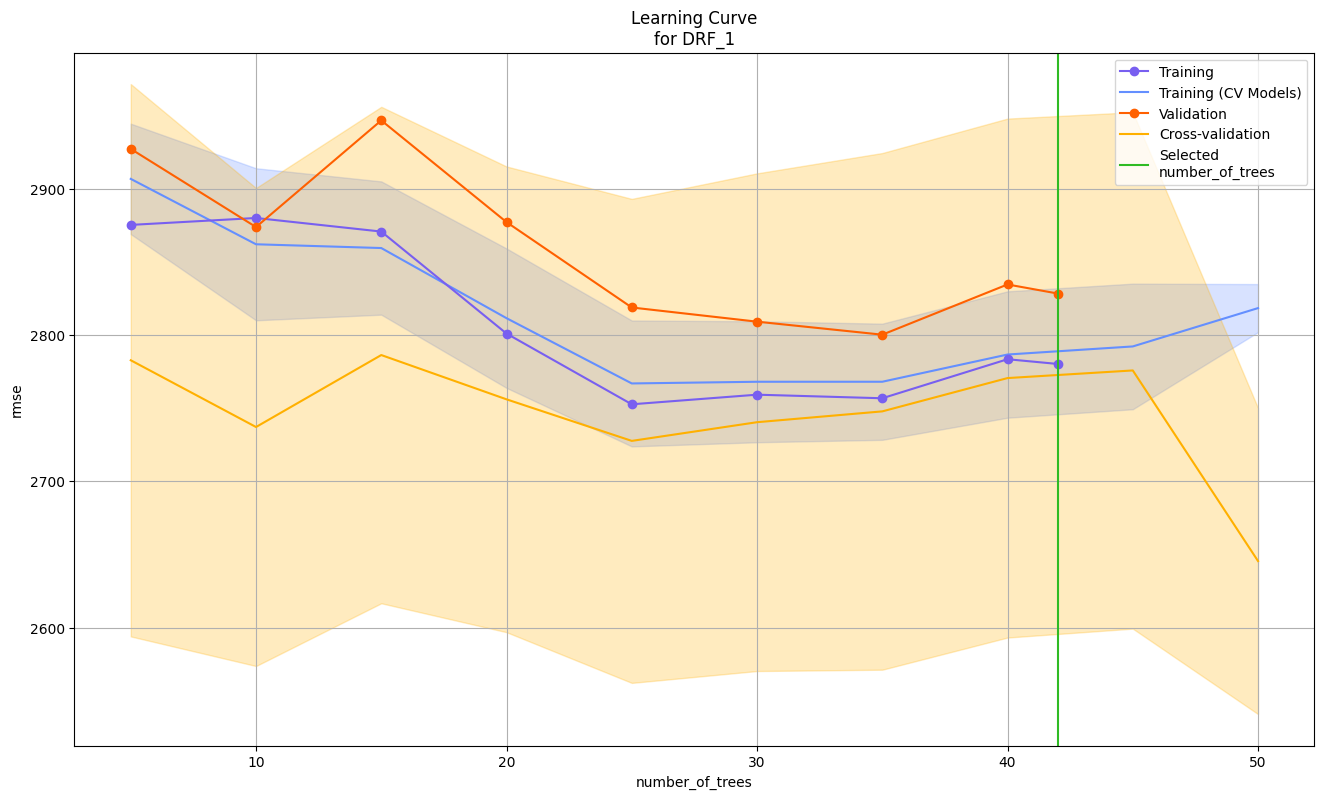

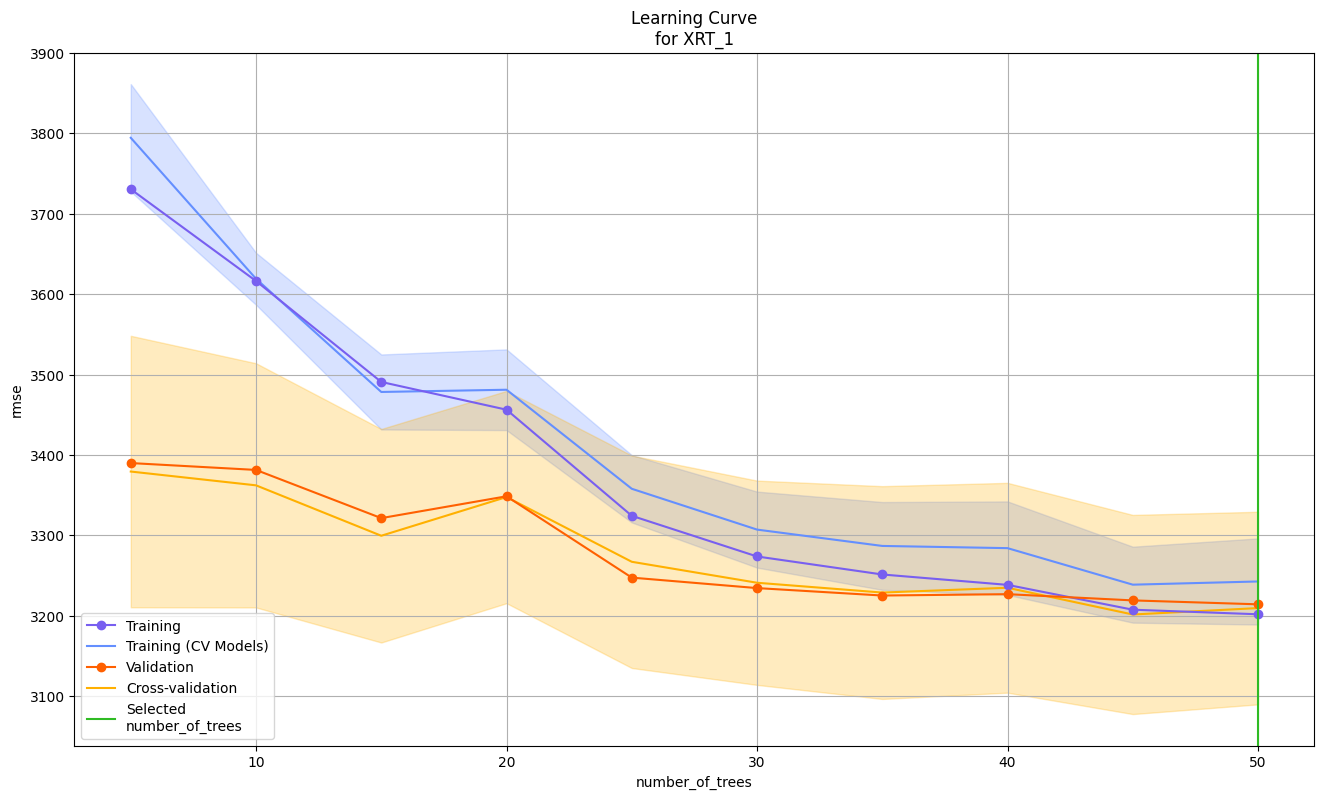

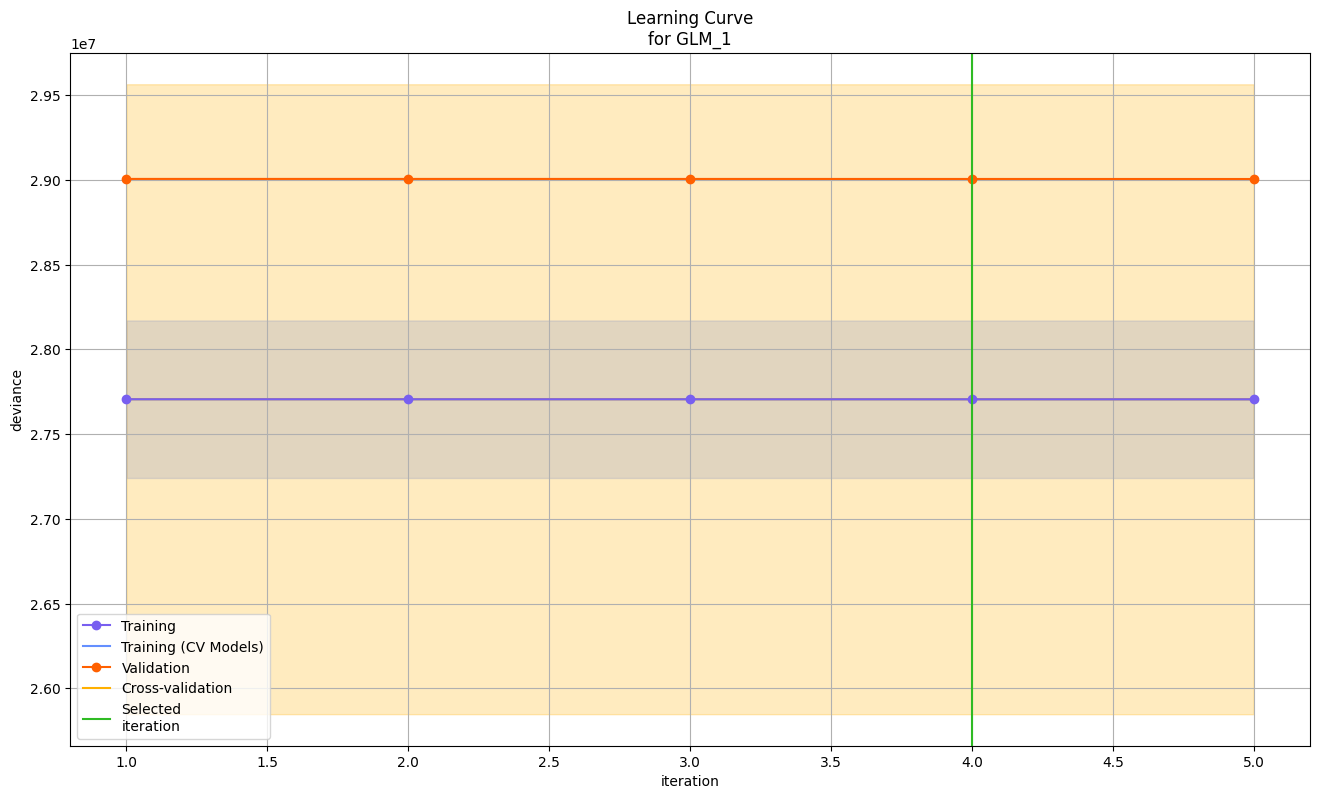

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [18]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [19]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")